In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import country_converter as coco
import numpy as np


In [183]:
df = pd.read_csv('D:/Desktop/DP_LIVE_07022023165643383.csv')

In [184]:
df = df[df.TIME == 2020]
df.head()

,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
69,CAN,SMOKERS,TOT,PC_POP15,A,2020,9.4,NaN
91,CZE,SMOKERS,TOT,PC_POP15,A,2020,16.6,NaN
178,FIN,SMOKERS,TOT,PC_POP15,A,2020,12.0,D
203,FRA,SMOKERS,TOT,PC_POP15,A,2020,25.5,NaN
261,ISL,SMOKERS,TOT,PC_POP15,A,2020,7.3,D


In [185]:
pivot = df.pivot(index='LOCATION', columns='SUBJECT', values='Value').reset_index().sort_values(by='TOT', ascending=True)

In [186]:
pivot['LOCATION'] = pivot.LOCATION.apply(lambda x: coco.convert(names=x, to='name_short', not_found=None))

In [187]:
pivot.head()

SUBJECT,LOCATION,MEN,TOT,WOMEN
14,Iceland,6.7,7.3,7.9
18,Mexico,12.3,7.4,2.9
13,India,14.4,8.1,1.4
22,Peru,13.5,8.2,3.0
5,Costa Rica,12.2,8.4,4.6


In [188]:
#Reference: https://colab.research.google.com/drive/1lKuaZUp8LggiDFbct0-DcUDMMYdvO4Tp?usp=sharing#scrollTo=sBkAKOCTYOek

def color_title(labels, colors, textprops = {'size':'large'}, ax = None, y = 1.013,
               precision = 10**-2):
     
    "Creates a centered title with multiple colors. Don't change axes limits afterwards."
        
    if ax == None:
        ax = plt.gca()
        
    plt.gcf().canvas.draw()
    transform = ax.transAxes # use axes coords
    
    # initial params
    xT = 0 # where the text ends in x-axis coords
    shift = 0 # where the text starts
    
    # for text objects
    text = dict()

    while (np.abs(shift - (1-xT)) > precision) and (shift <= xT) :         
        x_pos = shift 
        
        for label, col in zip(labels, colors):

            try:
                text[label].remove()
            except KeyError:
                pass
            
            text[label] = ax.text(x_pos, y, label, 
                        transform = transform, 
                        ha = 'left',
                        color = col,
                                            **textprops)
            
            x_pos = text[label].get_window_extent()\
                   .transformed(transform.inverted()).x1
            
        xT = x_pos # where all text ends
        
        shift += precision/2 # increase for next iteration
      
        if x_pos > 1: # guardrail 
            break

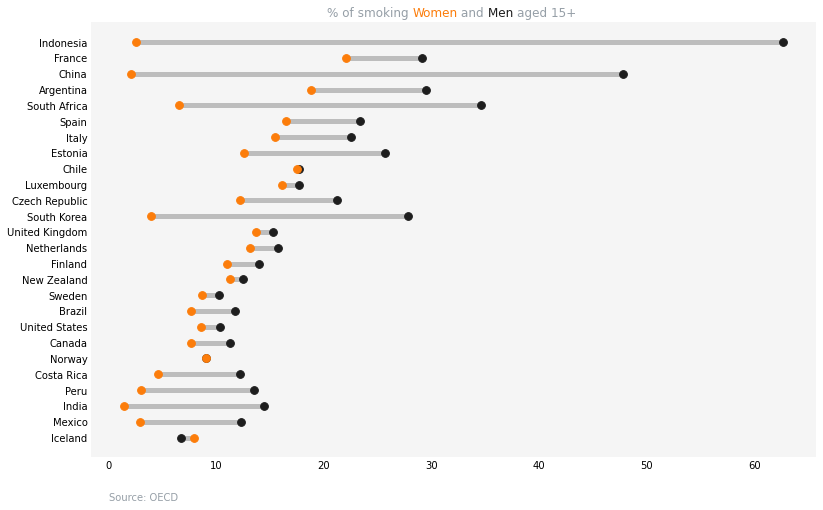

In [195]:
# Create playground
fig, ax = plt.subplots(figsize=(13, 8))

# Visuals
pivot.plot.scatter(x='MEN',  y='LOCATION', ax=ax, color='#1E1E1E', s=60)
pivot.plot.scatter(x='WOMEN', y='LOCATION', ax=ax,c='#FC7D0B', s=60)
ax.hlines(y= range(0,len(pivot.index)), xmin=pivot['WOMEN'], xmax=pivot['MEN'], linewidth=5, color='#BDBDBD', zorder=0)


# Background and remove noise
ax.set_facecolor('#F5F5F5')
ax.spines[['bottom', 'top', 'left', 'right']].set_visible(False)
ax.tick_params(axis='both', length=0)
ax.set(ylabel=None)
ax.set(xlabel=None)

# Title color
label_list = ['% of smoking ', 'Women', ' and ', 'Men ', 'aged 15+']
colors = ['#969FA7', '#FC7D0B', '#969FA7', '#1E1E1E', '#969FA7']
color_title(label_list, colors)

plt.text(0,-4,'Source: OECD', c='#969FA7');

plt.savefig('Smokers.png', dpi=300, facecolor='#F5F5F5',bbox_inches='tight' )